<a href="https://colab.research.google.com/github/InVicibL/ITMO/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

In [ ]:
!git clone https://github.com/InVicibL/ITMO


fatal: destination path 'ITMO' already exists and is not an empty directory.


## Описание исходных данных

Данные представляют собой трекинг занятий посетителей в зале

**Переменная отклика** - количество соженных калорий

**Предикторы**:
1. Возраст
2. Гендер
3. Вес
4. Рост
5. Максимальная частота сердечных сокращений (ударов в минуту) во время тренировок
6. Средняя частота сердечных сокращений во время тренировок
7. Частота сердечных сокращений в состоянии покоя перед тренировкой
8. Продолжительность тренировки (часы)
9. Тип упражнений
10. Процент жира в организме
11. Объем воды, употреблленный во время тренировки (литры)
12. Количество тренировок в неделю
13. Уровень опыта в тренировках( от новичка - 1 до эксперта - 3)
14. Индекс массы тела (расчитанный из веса и роста человека)

In [326]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, classification_report, root_mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv('ITMO/gym_members_exercise_tracking.csv')

In [ ]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [ ]:
data.shape
#в базе представлены данные о 973 клиентов по 15 параметрам.

(973, 15)

In [ ]:
data.dtypes
#В базе данных всего 2 категориальные переменные, остальные количественные. Среди них 7 переменных это числа с плавающей точкой.

,0
Age,int64
Gender,object
Weight (kg),float64
Height (m),float64
Max_BPM,int64
Avg_BPM,int64
Resting_BPM,int64
Session_Duration (hours),float64
Calories_Burned,float64
Workout_Type,object


In [ ]:
data.isna().sum()
#Пропущенные значения отсутсвуют.

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


## Количественные переменные

In [ ]:
num_cols = data.select_dtypes(exclude='object')
num_cols.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


На первый взгляд распределение количественных переменных близко к нормальному. Среднее значение не сильно отличается от медианы, что может указывать на отсутствие "тяжелых хвостов". Коэффициент вариации в основном не достигает и 0.5.
Средний возраст находится около 40, что может говорить о репрезентативной выборке, так как нередко в опросах именно этот возраст принимается за средний. Минимальный возраст равен порогу совершеннолетия и равен 18.
Максимальные значения веса и роста 130 кг и 2 м соответственно. То есть, аномалии в данных по этим парамеетрам не ожидаются.
В среднем люди занимаются в зале 1,5 часа. Есть индивидуумы, которые ходят в зал 5 дней в неделю. Возможно, это те, у кого фитнес являяется профессией.
По нашему отбору колонок сюда попала и переменная уровня подготовки, хотя по факту она является категориальной порядковой. Так как порядковость здесь явная, преобразовывать ее в текст мы не будем, а оставим в Label encoding.




In [ ]:
fig = px.scatter_matrix(num_cols)
fig.update_layout(
    width=2100,
    height=2200,
)
fig.show()

Точеченые диаграммы показывают, что у переаменной отклика суцествует линейная прямая связь с продолжительностью тренировок и обратная с процентом жира у человека. Также есть связь с количеством посещений в неделю, однако на интревале от 2 до 3 раз значимой разницы не наблюдается.А вот у опыта видна прямая связь с количеством соженных калорий.

In [ ]:
corr_matrix = num_cols.corr()
fig = px.imshow(corr_matrix, text_auto=".2f")
fig.update_layout(
    width=1000,
    height=1000,
)
fig.show()

Высокая корреляция наблюдается у переменной отклика с продолжительностью тренировки, с процентом жира, с частотой тренировок и уровнем подготовки.
Однако, у этих же переменных наблюдается высокий уровень мультиколлинеарности друг с другом больше 0.5. При таком пороге либо необходимо удалять из анализа все, кроме одной (наиболее коррелированной - продолжительности тренировок), либо их нужно обработать более сложными методами, например, PCA.

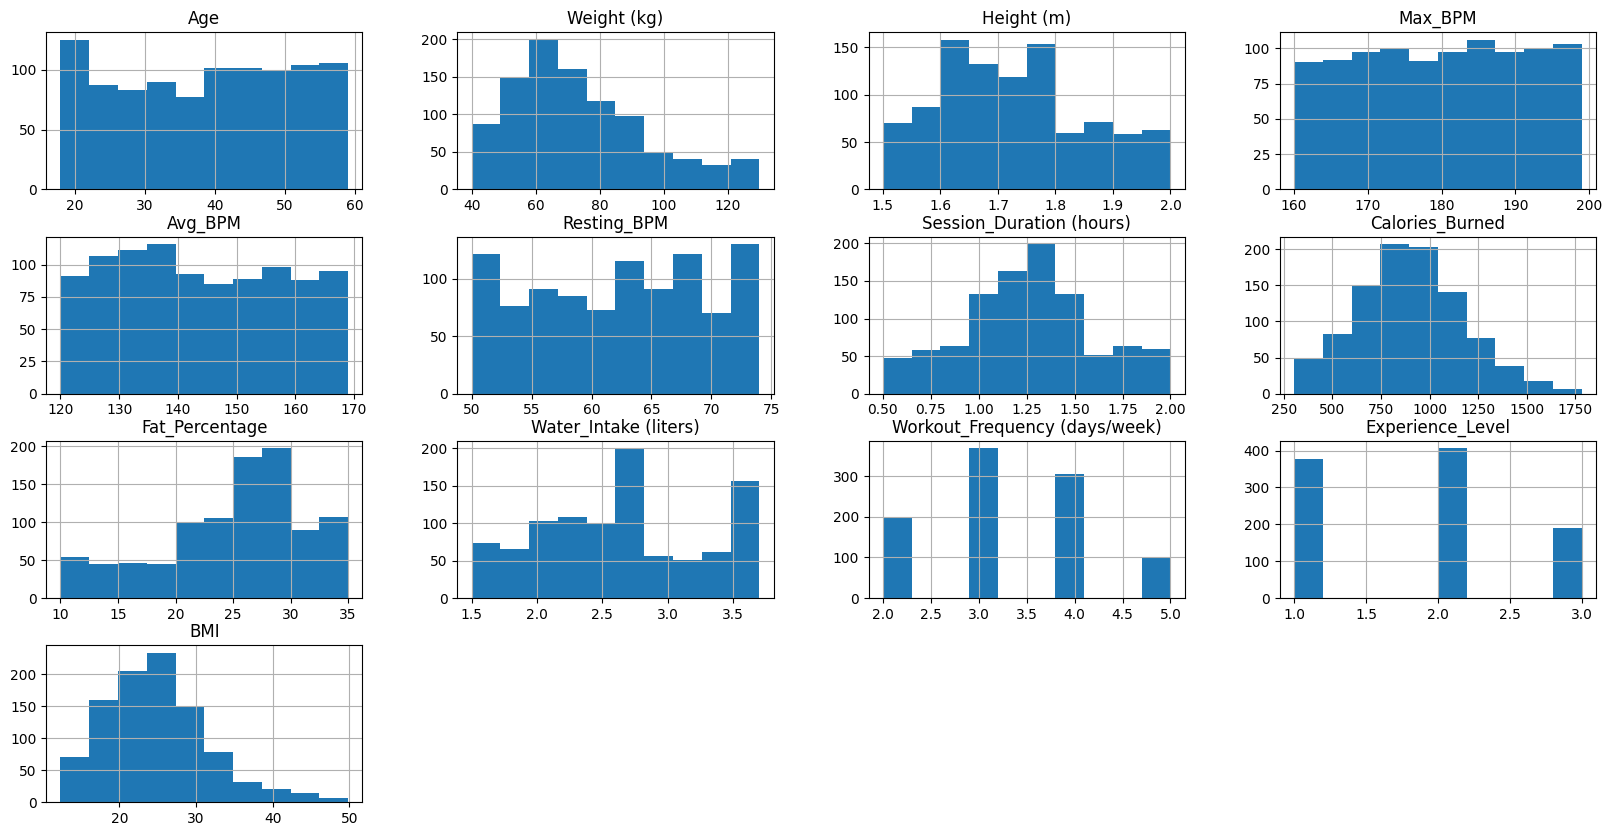

In [ ]:
name_num_cols = list(num_cols.columns)
fig, axs = plt.subplots(4, 4, figsize=(20, 10))
for ax, col in zip(axs.flatten(), name_num_cols):
    data.hist(column=col, ax=ax)
for ax in axs.flat[len(num_cols.columns):]:
    ax.remove()
fig.show()

Вопреки изначальным догадкам, по виду нормальное распределение виднется лишь у продолжительности сессии и, возможно, у индекса массы.

##Категориальные переменные

In [ ]:
cat_cols = data.select_dtypes(include='object')
cat_cols.head()

,Gender,Workout_Type
0,Male,Yoga
1,Female,HIIT
2,Female,Cardio
3,Male,Strength
4,Male,Strength


In [ ]:
cat_cols.describe()

,Gender,Workout_Type
count,973,973
unique,2,4
top,Male,Strength
freq,511,258


В нашей выборке больше мужчин.
У нас всего 4 типа упражнения. Наиболее популярные - силовые.

In [ ]:
count_types=data.groupby(['Workout_Type']).size().reset_index(name='counts')
fig = px.pie(count_types, values='counts', names='Workout_Type', title='Workout Types')
fig.show()

По пайчарту видно что распределение типов тренировок практически симметрично.

In [ ]:
fig = px.box(data, x="Gender", y="Calories_Burned")
fig.show()

In [ ]:
fig = px.box(data, x="Workout_Type", y="Calories_Burned")
fig.show()

На боксплоте не выявляется отличий в распределение переменной соженных калорий в зависимости от гендера или типа тренировки.

С категориальными переменными необходимо провести обработку в виде onehot encoding

In [295]:
ohe = OneHotEncoder()
res = ohe.fit_transform(data['Gender'].to_numpy().reshape(-1, 1))
ohe_df = pd.DataFrame(res.toarray(), columns=ohe.get_feature_names_out())
res = pd.get_dummies(data['Gender'], prefix='sex', drop_first=True)
res

,sex_Male
0,True
1,False
2,False
3,True
4,True
...,...
968,True
969,True
970,False
971,True


In [297]:
ohe = OneHotEncoder()
res2 = ohe.fit_transform(data['Workout_Type'].to_numpy().reshape(-1, 1))
ohe_df = pd.DataFrame(res2.toarray(), columns=ohe.get_feature_names_out())
res2 = pd.get_dummies(data['Workout_Type'], prefix='WT', drop_first=True)
res2

,WT_HIIT,WT_Strength,WT_Yoga
0,False,False,True
1,True,False,False
2,False,False,False
3,False,True,False
4,False,True,False
...,...,...,...
968,False,True,False
969,False,True,False
970,False,False,False
971,True,False,False


In [298]:
data = pd.concat([data, res], axis=1).drop(columns='Gender')
data = pd.concat([data, res2], axis=1).drop(columns='Workout_Type')
data.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,sex_Male,WT_HIIT,WT_Strength,WT_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,True,False,False,True
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,False,True,False,False
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,False,False,False,False
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,True,False,True,False
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,True,False,True,False


In [301]:
corrs = data.corr()
upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(np.bool_))
upper_tri

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,sex_Male,WT_HIIT,WT_Strength,WT_Yoga
Age,NaN,-0.03634,-0.027837,-0.017073,0.035969,0.004354,-0.019912,-0.154679,0.002370,0.041528,0.008055,-0.018676,-0.013691,0.027175,0.011677,0.013132,0.025819
Weight (kg),NaN,NaN,0.365321,0.057061,0.009717,-0.032138,-0.013666,0.095443,-0.225512,0.394276,-0.011769,0.003379,0.853158,0.579340,0.019779,-0.047244,0.000860
Height (m),NaN,NaN,NaN,-0.017660,-0.014776,-0.005090,-0.010206,0.086348,-0.235521,0.393533,-0.011270,-0.010267,-0.159469,0.583503,-0.013645,-0.027642,0.056175
Max_BPM,NaN,NaN,NaN,NaN,-0.039751,0.036647,0.010051,0.002090,-0.009056,0.031621,-0.029099,0.000545,0.067105,0.010245,0.010789,-0.044674,0.035805
Avg_BPM,NaN,NaN,NaN,NaN,NaN,0.059636,0.016014,0.339659,-0.007302,-0.002911,-0.010681,-0.000888,0.021605,0.009648,-0.009143,0.022928,-0.019856
Resting_BPM,NaN,NaN,NaN,NaN,NaN,NaN,-0.016649,0.016518,-0.016834,0.007726,-0.007967,0.001758,-0.032543,0.014062,0.034404,0.019858,-0.034331
Session_Duration (hours),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.908140,-0.581520,0.283411,0.644140,0.764768,-0.006493,-0.012200,0.048439,0.006538,0.010688
Calories_Burned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.597615,0.356931,0.576150,0.694129,0.059761,0.150646,0.040550,0.011629,-0.004678
Fat_Percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.588683,-0.537060,-0.654363,-0.119258,-0.407309,-0.044685,0.046331,-0.044975
Water_Intake (liters),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238563,0.304104,0.213697,0.667658,0.023788,-0.027432,0.014878


In [304]:
cols_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
cols_to_drop

[]

В результате проверки на мультиколлинеарность на уровне 0.95 ни одна колонка не была удалена.

##Разбиение выборки

In [308]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns='Calories_Burned'),
    data['Calories_Burned'],
    random_state=123,
    test_size=0.3
)

Масштабирование данных

In [311]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)

##Строим модель константного предсказания

In [323]:
dummy = DummyRegressor(strategy='median')
dummy.fit(X_train_scaled, y_train)
y_preds_dummy = dummy.predict(X_test_scaled)

##Строим линейную регрессию

In [313]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_preds_lr = lr.predict(X_test_scaled)

##Проверка качества модели

Так как мы решаем задачу регрессии и абсолютные разницы нашей результирующей переменной интерпретируемы, в качестве метрик выбраны RMSE и MAE.

In [325]:
print(f'RMSE for dummy: {root_mean_squared_error(y_test, y_preds_dummy)}')
print(f'MAE for dummy: {mean_absolute_error(y_test, y_preds_dummy)}')
print(f'RMSE for linear: {root_mean_squared_error(y_test, y_preds_lr)}')
print(f'MAE for linear: {mean_absolute_error(y_test, y_preds_lr)}')

RMSE for dummy: 274.9769417481231
MAE for dummy: 220.99657534246575
RMSE for linear: 35.220388142430785
MAE for linear: 27.727777508143706


По найденным метрикам было обнаружено, что линейная регрессия в среднем ошибается почти в 9 раз меньше. На это же и указывает MAE, которую можно интерпретировать как медиану.

In [327]:
print(f'R2 score for Dummy Regressor: {r2_score(y_test, y_preds_dummy)}')
print(f'R2 score for Linear regression: {r2_score(y_test, y_preds_lr)}')

R2 score for Dummy Regressor: -0.008231459010322073
R2 score for Linear regression: 0.9834592207851514


Предикторы согласно коэф. детерминации обьясняют вариацию результирующей прееменной на 98%, что является хорошим результатом.

##Неудачаная работа в плотли. Буду рад помощи

In [329]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left")

fig.add_trace(go.Histogram(x=num_cols['Max_BPM']),
              row=1, col=1)

fig.add_trace(go.Histogram(x=num_cols['Calories_Burned']),
              row=1, col=2)

fig.add_trace(go.Histogram(x=num_cols['BMI']),
              row=2, col=1)

fig.add_trace(go.Histogram(x=num_cols['Fat_Percentage']),
              row=2, col=2)

fig.show()
# Не хотелось самому прописывать функцию для каждой кол-ой колонки

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=4, cols=4)

for i, col in enumerate(num_cols.columns[0:4]):
  fig.add_trace(go.Histogram(x=num_cols[col]),
              row=1, col=i+1)

for i, col in enumerate(num_cols.columns[5:9]):
  fig.add_trace(go.Histogram(x=num_cols[col]),
              row=2, col=i+1)
for i, col in enumerate(num_cols.columns[10:12]):
  fig.add_trace(go.Histogram(x=num_cols[col]),
              row=3, col=i+1)
fig.show()

#Смог церез цикл сделать построение графиков, чтобы вручную не писать как в коде выше. Но не разобрался как нормально переиминовать trace

In [ ]:
df = data.reset_index()
df = df.rename(columns={"index":"ID"})
df['ID'] = df.index
df.head()

,ID,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [ ]:
df=df.melt(id_vars='ID')

In [ ]:
df

,ID,variable,value
0,0,Age,56
1,1,Age,46
2,2,Age,32
3,3,Age,25
4,4,Age,38
...,...,...,...
14590,968,BMI,28.77
14591,969,BMI,25.69
14592,970,BMI,19.5
14593,971,BMI,37.74


In [330]:
fig = px.histogram(df, x="value", color="variable", facet_col="variable",  facet_col_wrap=4)
fig.update_xaxes(matches=None)
fig.show()

In [ ]:
fig = px.scatter(df, x="value", y="ID", color="variable", facet_col="variable")
fig.show()

In [ ]:
df1 = num_cols.reset_index()
df1 = df1.rename(columns={"index":"ID"})
df1['ID'] = df1.index
df1=df1.melt(id_vars='ID')
df1.head()

,ID,variable,value
0,0,Age,56.0
1,1,Age,46.0
2,2,Age,32.0
3,3,Age,25.0
4,4,Age,38.0


In [ ]:
fig = px.histogram(df1, x="value", color="variable", facet_col="variable",facet_col_wrap=3)
fig.update_xaxes(matches=None)
fig.update_yaxes(matches=None)
fig.update_layout(
    width=2000,
    height=1000,
)
fig.show()

Перевел данные в лонгер формат чтобы построить при помощи функции facet, но не получается добиться нормального вида гистограмм, nbins не помог.